<h1>POSTTEST 6</h1>
<h3>Ricky Novenda Putra</h3>
<h3>2009106073</h3>

<h4>Kita Install dulu Library yang dibutuhkan</h4>

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

<h1>DATASET HEALTHCARE</h1>

<h4>Untuk Melihat Dataset</h4>

In [146]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h1>DATA RECORD</h1>

<h4>Untuk Melihat Tipe Data dan Data Record.</h4>

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [148]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [149]:
print(f'panjang dataset {len(df)} baris')

panjang dataset 5110 baris


<h1>DATA CLEANING</h1>

<h4>Data cleaning adalah memperbarui, membetulkan, dan membuat data menjadi lebih rapi.</h4>

In [150]:
dataset_cleaning = df.copy()

In [151]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

<h2>MODUS</h2>

In [152]:
dataset_cleaning['bmi'] = imputer_mean.fit_transform(dataset_cleaning[['bmi']])

dataset_cleaning.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<h2>MEDIAN NILAI TENGAH</h2>

In [153]:
dataset_cleaning['age'] = imputer_median.fit_transform(dataset_cleaning[['age']])

dataset_cleaning.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [154]:
dataset_cleaning.dropna(inplace=True)
dataset_cleaning.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [155]:
len(dataset_cleaning)

5110

<h2>DATA DUPLIKAT</h2>

In [156]:
dataset_duplicate = df.copy()
dataset_duplicate.duplicated().sum()

0

In [157]:
dataset_duplicate.drop_duplicates(inplace=True)
dataset_duplicate.duplicated().sum()

0

<h1>K-MEANS</h1>

<h4>K-means merupakan salah satu algoritma yang bersifat unsupervised learning. K-Means memiliki fungsi untuk mengelompokkan data kedalam data cluster. Algoritma ini dapat menerima data tanpa ada label kategori. K-Means Clustering Algoritma juga merupakan metode non-hierarchy. Metode Clustering Algoritma adalah mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain.</h4>

In [158]:
dataset_cleaning.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1


In [159]:
dataset_model = KMeans(n_clusters=4)

In [160]:
point = dataset_cleaning[['age','bmi']]

In [161]:
dataset_model.fit(point)

KMeans(n_clusters=4)

In [162]:
labels = dataset_model.labels_

In [163]:
labels

array([2, 0, 2, ..., 3, 0, 0])

In [164]:
nilai_x = point['age']
nilai_y = point['bmi']

In [165]:
data_centroid = dataset_model.cluster_centers_

In [166]:
data_centroid

array([[52.6928392 , 31.76564981],
       [10.81655691, 21.75101686],
       [72.96035242, 29.3738905 ],
       [32.34318182, 30.76729506]])

In [167]:
centroid_xc = data_centroid[:,0]
centroid_yc = data_centroid[:,1]

<h1>VISUALISASI</h1>

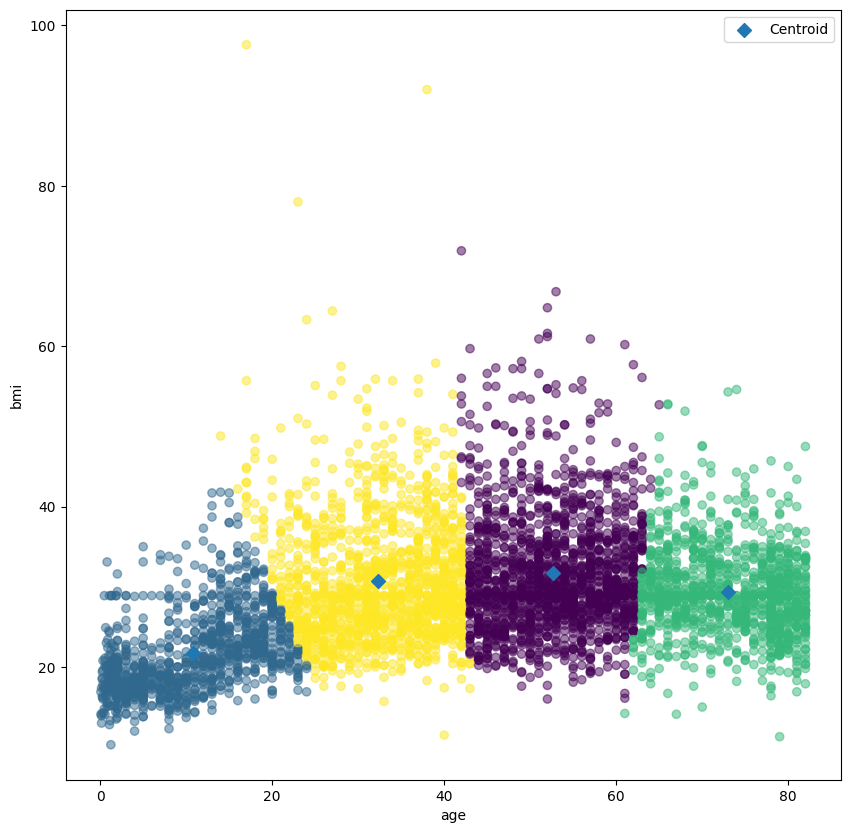

In [168]:
plt.figure(figsize=(10,10))
plt.scatter(nilai_x, nilai_y, alpha=0.5, c=labels)
plt.scatter(centroid_xc, centroid_yc, marker='D', s=50, label='Centroid')
plt.xlabel('age')
plt.ylabel('bmi')
plt.legend()
plt.show()

In [169]:
cluster_range = range(1,8)
inertias = []
for k in cluster_range:
    dataset_model = KMeans(n_clusters=k)
    dataset_model.fit(point)
    inertias.append(dataset_model.inertia_)

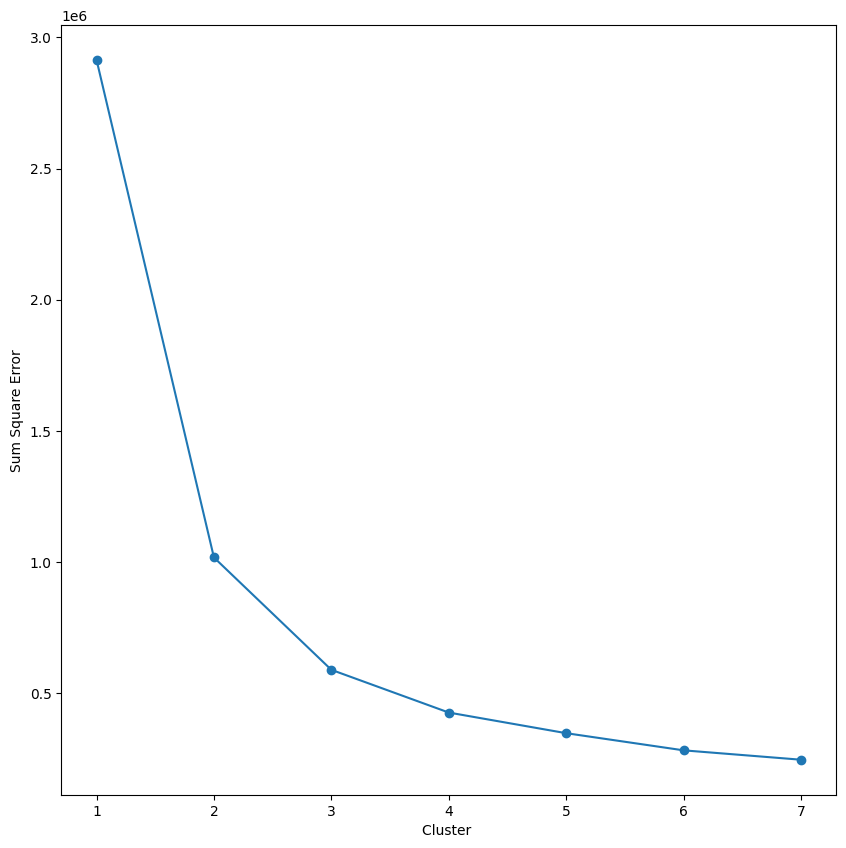

In [170]:
plt.figure(figsize=(10,10))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ')
plt.ylabel('Sum Square Error')
plt.xticks(cluster_range)
plt.show()